In [149]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [152]:
X=pd.read_csv('../smote/train_x.csv')
Y=pd.read_csv('../smote/train_y.csv')
Y=Y['target']
X.drop(['Unnamed: 0'],axis=1,inplace=True)

In [153]:


x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3, random_state=42)

In [154]:
clf=RandomForestClassifier(max_depth=10, class_weight='balanced',min_samples_split=8,min_samples_leaf=5,max_features=40,n_estimators=1000)
clf.fit(x_train,y_train)
y_prob=clf.predict_proba(x_train)
y_prob_pos=y_prob[:,1]
y_pred=clf.predict(x_train)

In [155]:
score=roc_auc_score(y_train,y_prob_pos)
print('AUC score is '+str(score))
print('Accuracy score is :'+str(accuracy_score(y_train,y_pred)))
print('precision  is :'+str(precision_score(y_train,y_pred)))
print('f1 score is :'+str(f1_score(y_train,y_pred)))
print('recall score is :'+str(recall_score(y_train,y_pred)))


AUC score is 0.938546427751209
Accuracy score is :0.8639440534361411
precision  is :0.8996754204780171
f1 score is :0.857705471423883
recall score is :0.8194767962730694


In [156]:
y_prob_test=clf.predict_proba(x_test)
y_prob_pos_test=y_prob_test[:,1]
score=roc_auc_score(y_test,y_prob_pos_test)
y_pred_test=clf.predict(x_test)
print('AUC score is '+str(score))
print('Accuracy score is :'+str(accuracy_score(y_test,y_pred_test)))
print('precision  is :'+str(precision_score(y_test,y_pred_test)))
print('f1 score is :'+str(f1_score(y_test,y_pred_test)))
print('recall score is :'+str(recall_score(y_test,y_pred_test)))

AUC score is 0.9211853809993809
Accuracy score is :0.852735069553394
precision  is :0.892074592074592
f1 score is :0.8446259103950562
recall score is :0.8019698239731768


In [157]:
y_pred_test=clf.predict(x_test)
cm=confusion_matrix(y_test,y_pred_test)
score=clf.score(x_test,y_test)
print(cm)
print(score)

[[4326  463]
 [ 945 3827]]
0.852735069553394


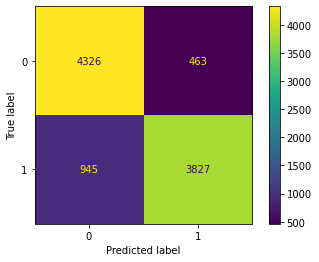

In [158]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()


In [159]:
only_zeros=[0 for _ in range(len(y_train))]

In [160]:
score=roc_auc_score(y_train,only_zeros)
print('AUC score is '+str(score))

AUC score is 0.5


In [161]:
fpr, tpr, threshold = roc_curve(y_train, y_prob_pos)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_train, only_zeros)

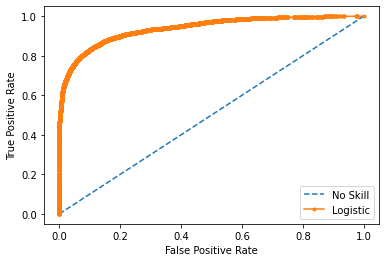

In [162]:
import matplotlib.pyplot as plt
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

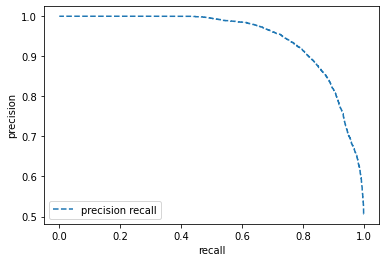

In [163]:
precision,recall,threshold=precision_recall_curve(y_train, y_prob_pos)
plt.plot(recall, precision, linestyle='--', label='precision recall')

# axis labels
plt.xlabel('recall')
plt.ylabel('precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [164]:
threshold=np.insert(threshold,0,0)


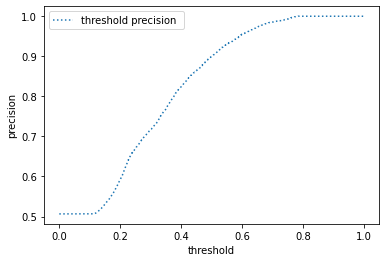

In [165]:
plt.plot(threshold, precision, linestyle='dotted', label='threshold precision ')

# axis labels
plt.xlabel('threshold')
plt.ylabel('precision')
# show the legend
plt.legend()
# show the plot
plt.show()



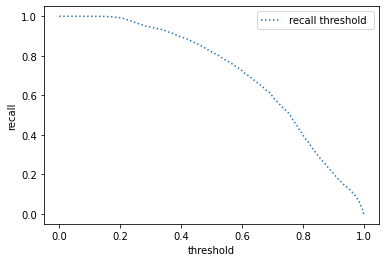

In [166]:
plt.plot(threshold, recall, linestyle='dotted', label='recall threshold ')

# axis labels
plt.xlabel('threshold')
plt.ylabel('recall')
# show the legend
plt.legend()
# show the plot
plt.show()

In [167]:
X_val=pd.read_csv('../test_x.csv')

In [168]:
test_proba=clf.predict_proba(X_val)
y_prob_pos_test=test_proba[:,1]

In [169]:
y_val=pd.read_csv('../test_y.csv')

In [170]:
y_val['target']=y_prob_pos_test

In [171]:
y_val.to_csv('rf.csv',index=False)